In [1]:
import numpy as np


In [2]:
data = np.load('data.npy')
target = np.load('target.npy')

In [4]:
print(data.shape)
print(target.shape)

(312, 2500)
(312,)


In [5]:
print(np.bincount(target))

[ 89 120 103]


In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten = True, random_state=42)
svc = SVC(kernel='rbf')

model = make_pipeline(pca, svc)

In [7]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size= 0.1)

In [8]:
model.fit(train_data,train_target)

,steps,"[('pca', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_components,150
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10


In [9]:
predicted_target = model.predict(test_data)

In [10]:
predicted_target

array([0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 2, 2, 1, 2, 2, 1, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(test_target, predicted_target)
acc

0.875

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  ,classification_report

matrix  = confusion_matrix(test_target, predicted_target)

In [13]:
matrix

array([[10,  0,  1],
       [ 1,  9,  0],
       [ 0,  2,  9]])

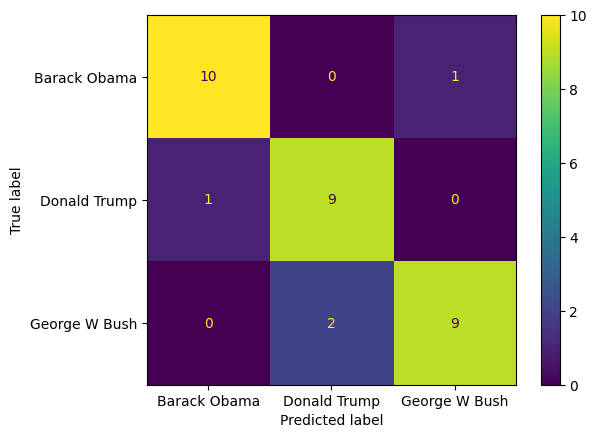

In [15]:
Matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Barack Obama', 'Donald Trump', 'George W Bush'])
Matrix.plot()

In [20]:
classification_report1 = classification_report(test_target, predicted_target, target_names=['Barack Obama', 'Donald Trump', 'George W Bush'])
print(classification_report1)

               precision    recall  f1-score   support

 Barack Obama       0.91      0.91      0.91        11
 Donald Trump       0.82      0.90      0.86        10
George W Bush       0.90      0.82      0.86        11

     accuracy                           0.88        32
    macro avg       0.88      0.88      0.87        32
 weighted avg       0.88      0.88      0.88        32



In [21]:
import joblib
joblib.dump(model, 'faceRecogntionSVM.sav')

['faceRecogntionSVM.sav']